#Sprint 3, T05

##Nivell 1

###Execise 1 - Explode database with Pandas

In [103]:
import pandas as pd
import numpy as np
my_df = pd.read_csv('DelayedFlights.csv')
my_df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [104]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [105]:
my_df.shape

(1936758, 30)

In [57]:
#Deleting all columns with no values
my_df.drop('Unnamed: 0', inplace=True, axis=1)
my_df.drop('Year', inplace=True, axis=1)
my_df.drop('DepTime', inplace=True, axis=1)
my_df.drop('ArrTime', inplace=True, axis=1)
my_df.drop('ActualElapsedTime', inplace=True, axis=1)
my_df.drop('Diverted', inplace=True, axis=1)

In [106]:
my_df.shape

(1936758, 30)

In [107]:
#Relationship between Cancelled and Adddelay - get a group of flights with Cancellation 0
new_df = my_df.loc[my_df['Cancelled'] == 0]
new_df[['ArrDelay','Cancelled']]

,ArrDelay,Cancelled
0,-14.0,0
1,2.0,0
2,14.0,0
3,34.0,0
4,11.0,0
...,...,...
1936753,25.0,0
1936754,75.0,0
1936755,99.0,0
1936756,9.0,0


If flight is cancelled(value == 1) there is no ArrDelay. This means that we should not consider these flight for statisctics about delays. Creating a new db with only flights with no cancelation will help to get correct statistics about delays.

###Execise 2 - Analysis of data

In [108]:
#Missing values by column
print(new_df.isnull().sum())

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                6477
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      7754
CRSElapsedTime          198
AirTime                7754
ArrDelay               7754
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 6477
TaxiOut                   0
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         688637
WeatherDelay         688637
NASDelay             688637
SecurityDelay        688637
LateAircraftDelay    688637
dtype: int64


In [109]:
#Creating new column - has or no some delay
modified_df = new_df.copy(deep=True)
modified_df['HasDelay'] = np.where(modified_df['ArrDelay'] >= 0, True, False)

In [110]:
modified_df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,HasDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,False
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,True
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN,True
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,True
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,True


In [111]:
#Airlines with the most delayed flights
#Get description of Unique Carrier - there are 20 different airlines
modified_df['UniqueCarrier'].describe()

count     1936125
unique         20
top            WN
freq       377587
Name: UniqueCarrier, dtype: object

In [112]:
sorted_df = modified_df.groupby(['UniqueCarrier'])['ArrDelay'].sum()
sorted_df.sort_values()

UniqueCarrier
AQ       15814.0
HA      255613.0
F9      788549.0
AS     1406735.0
9E     2420468.0
OH     2675993.0
B6     3025749.0
FL     3100150.0
NW     3462075.0
US     3571867.0
YV     3691461.0
EV     3888131.0
CO     4045932.0
DL     4535644.0
XE     5176042.0
OO     5978936.0
MQ     6396704.0
UA     6733013.0
AA     8889066.0
WN    11319092.0
Name: ArrDelay, dtype: float64

Airline with code WN has acumulated the most delays.

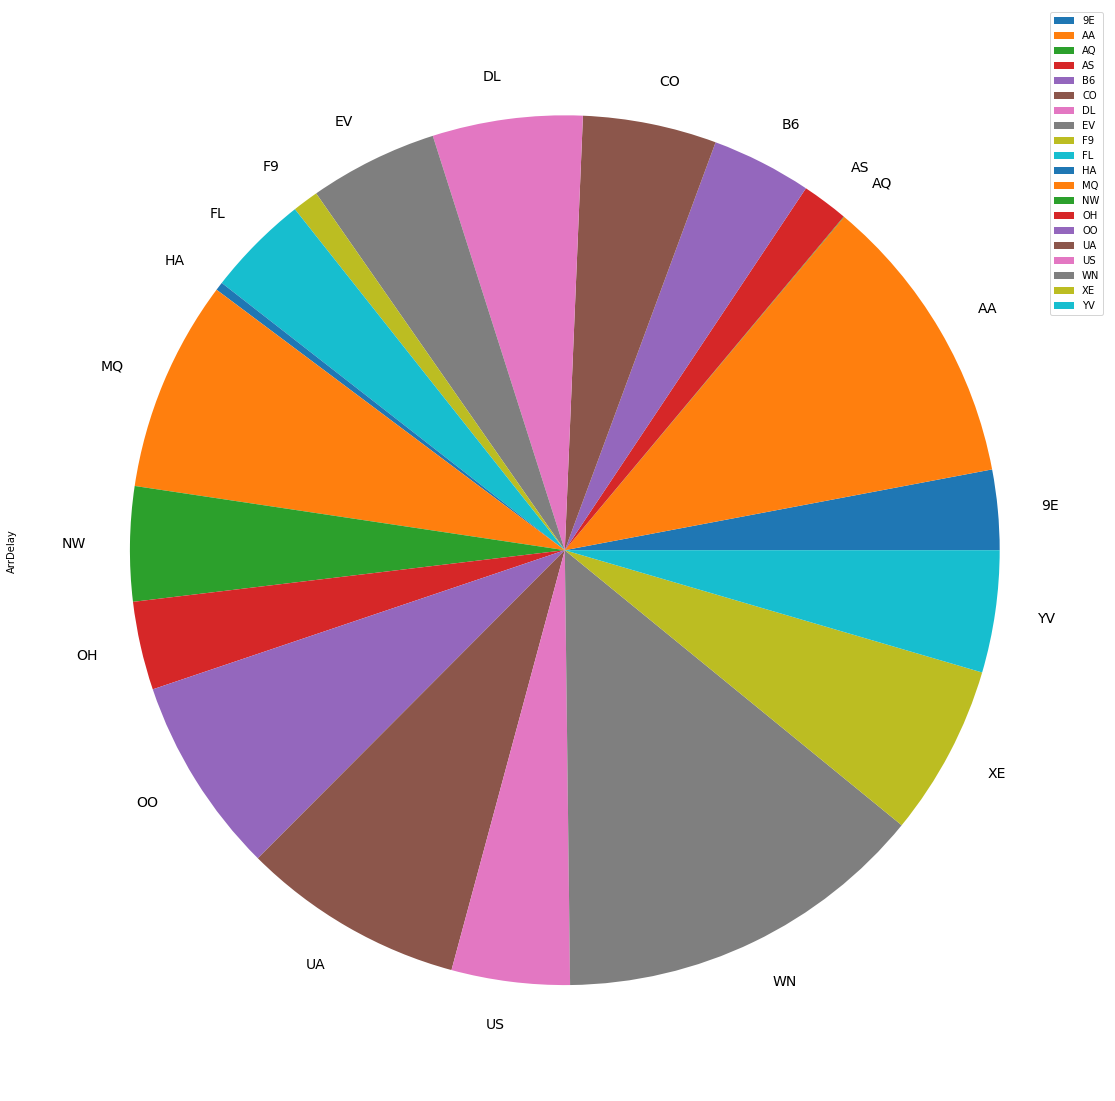

In [114]:
import matplotlib.pyplot as plt
test_df = pd.DataFrame(sorted_df)
plot = test_df.plot.pie(y='ArrDelay', figsize=(20, 20), fontsize=14)

In [115]:
#Longest flights
sorted2_df = modified_df.sort_values(['AirTime'], ascending=False)
sorted2_df[['UniqueCarrier', 'FlightNum', 'AirTime']]

,UniqueCarrier,FlightNum,AirTime
1488690,HA,21,1091.0
1367047,HA,28,733.0
362529,CO,15,664.0
556381,CO,15,655.0
556385,CO,15,654.0
...,...,...,...
1934369,DL,133,NaN
1934921,DL,792,NaN
1935596,DL,1610,NaN
1935716,DL,26,NaN


The longest flight is number 21 from HA airline.

In [116]:
#The most delayed flights
sorted3_df = modified_df.sort_values(by='ArrDelay',ascending=False)
sorted3_df[['UniqueCarrier', 'FlightNum', 'ArrDelay']]

,UniqueCarrier,FlightNum,ArrDelay
322516,NW,808,2461.0
686014,NW,1699,2453.0
839306,NW,1107,1951.0
1009553,MQ,3538,1707.0
1881639,NW,357,1655.0
...,...,...,...
1934369,DL,133,NaN
1934921,DL,792,NaN
1935596,DL,1610,NaN
1935716,DL,26,NaN


The most delayed flight is number 808 from NW airline.

In [130]:
export_df = modified_df.head(100)#Export only 100 first rows to keep file small
export_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,HasDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,False
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,True
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN,True
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,True
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,True


In [131]:
export_df.to_excel(r'newDataFrame.xlsx', sheet_name='Sheet1')

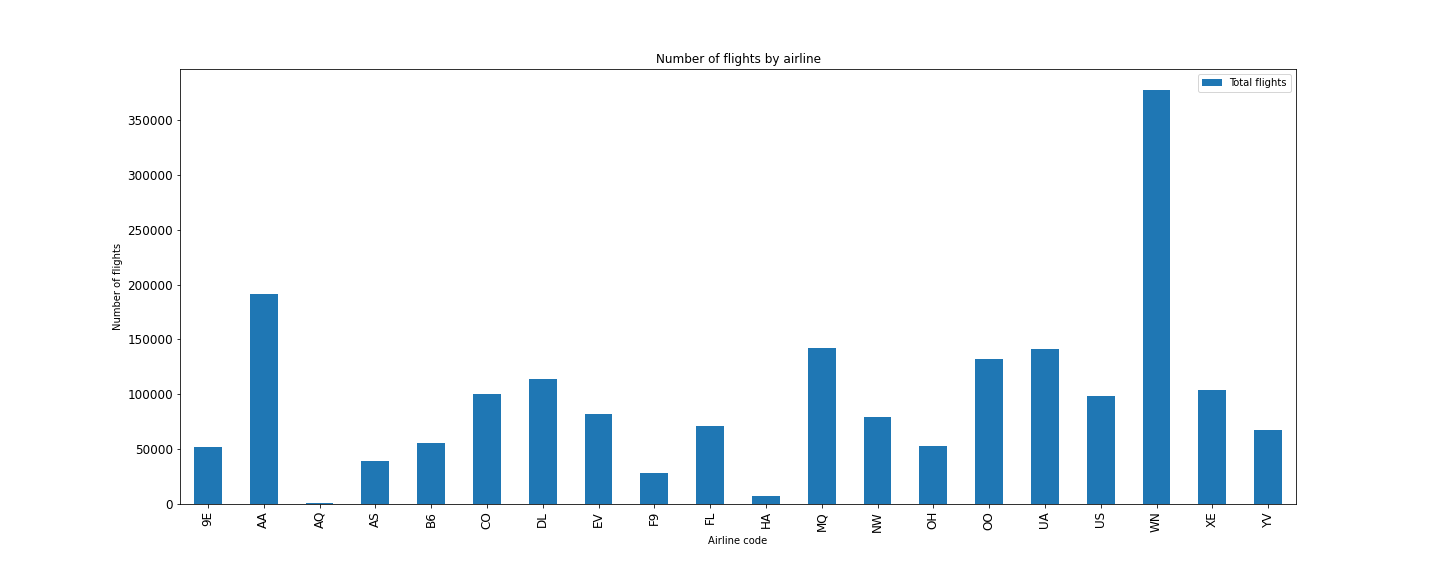

In [33]:
from IPython import display
display.Image("https://raw.githubusercontent.com/dominikapetru/visualitzacio_exploratoria/main/fig1.png")

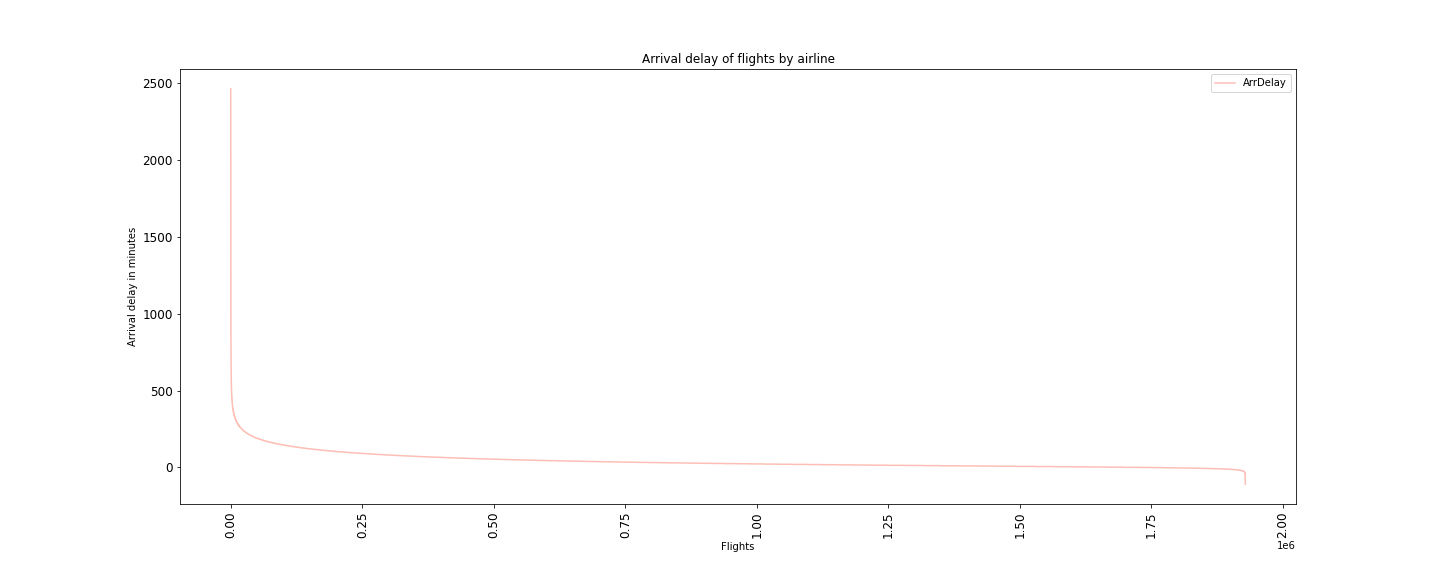

In [34]:
display.Image("https://raw.githubusercontent.com/dominikapetru/visualitzacio_exploratoria/main/fig2.png")

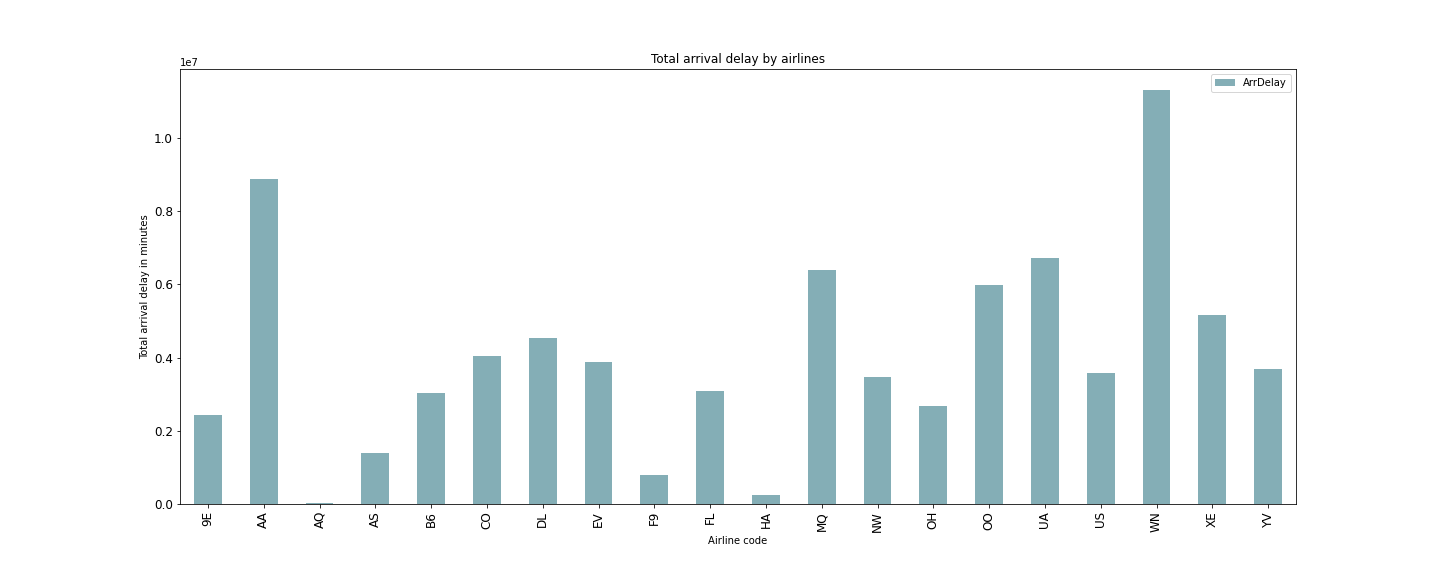

In [35]:
display.Image("https://raw.githubusercontent.com/dominikapetru/visualitzacio_exploratoria/main/fig3.png")

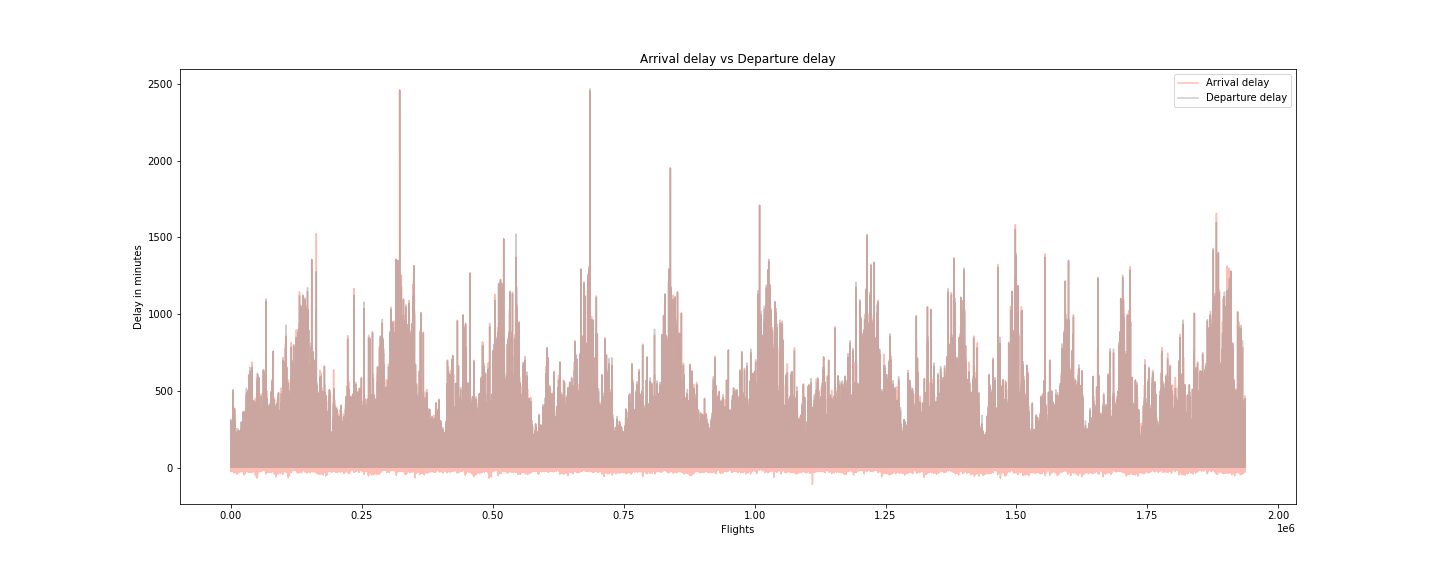

In [36]:
display.Image("https://raw.githubusercontent.com/dominikapetru/visualitzacio_exploratoria/main/fig4.png")

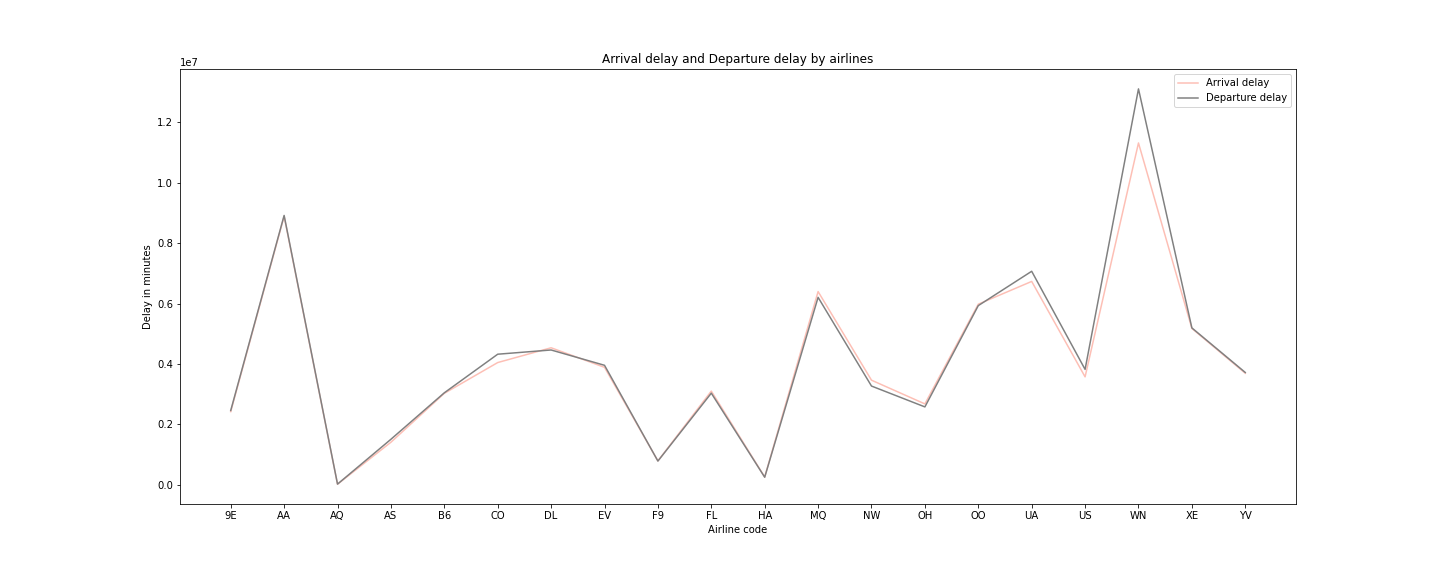

In [37]:
display.Image("https://raw.githubusercontent.com/dominikapetru/visualitzacio_exploratoria/main/fig5.png")

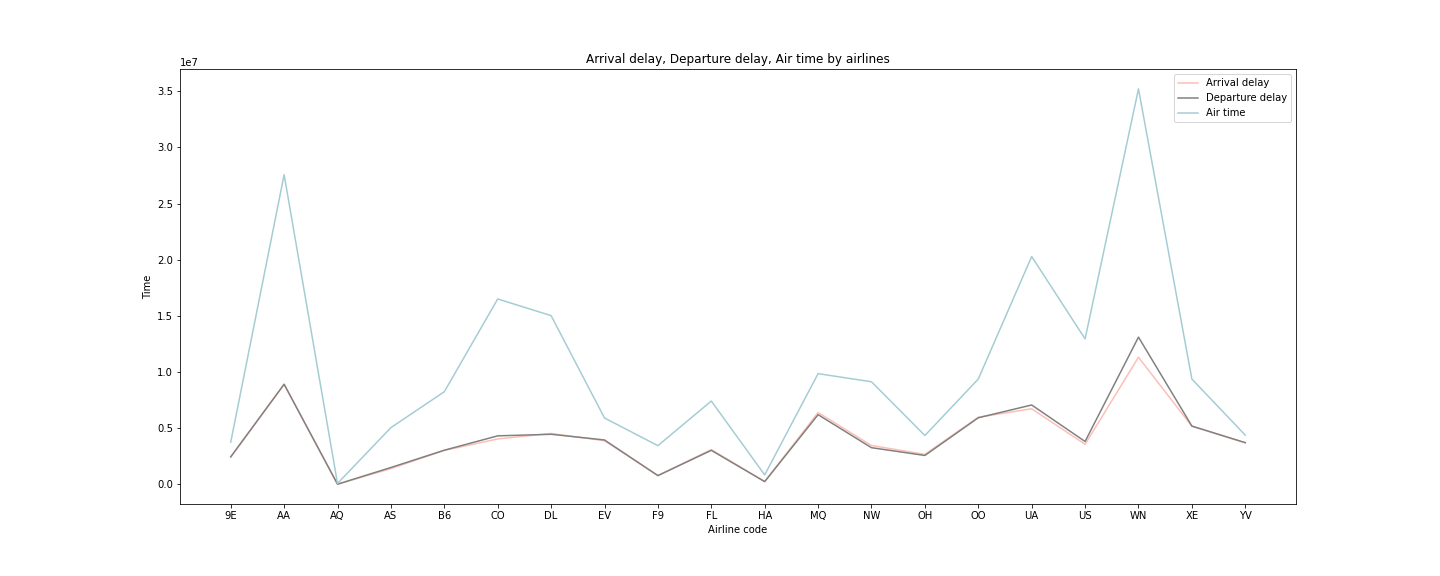

In [38]:
display.Image("https://raw.githubusercontent.com/dominikapetru/visualitzacio_exploratoria/main/fig6.png")